# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Reading dataset and data analysis

In [2]:
data=pd.read_csv("loan_approval_dataset.csv")

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
data.shape

(4269, 13)

In [5]:
data.drop(columns=['loan_id'],inplace=True)  # Deleting the unwanted columns

In [6]:
data.shape

(4269, 12)

In [7]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
data.isnull().sum()  # Checking null values

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

<AxesSubplot:>

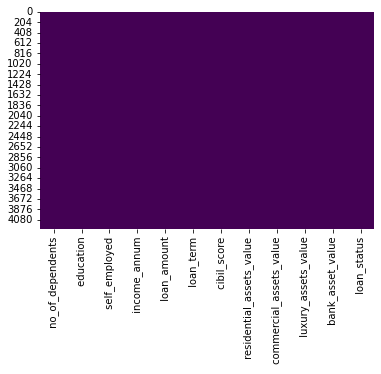

In [9]:
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)

In [10]:
data.duplicated().sum()

0

In [11]:
data.columns   

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
data.columns=data.columns.str.strip()
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
data['assets']=data.residential_assets_value + data.commercial_assets_value + data.luxury_assets_value + data.bank_asset_value

In [14]:
data.drop(columns = ['residential_assets_value','luxury_assets_value','commercial_assets_value','bank_asset_value'],inplace=True)

In [15]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   assets            4269 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


<AxesSubplot:xlabel='loan_status', ylabel='count'>

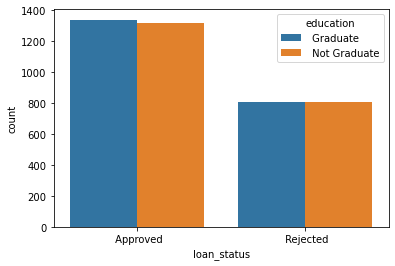

In [17]:
sns.countplot(x='loan_status',hue='education',data=data)

# converting categorical into numerical

In [18]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [19]:
def clean_data(x):
    return x.strip()
data['education']=data['education'].apply(clean_data)
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
data['education'].replace(['Graduate', 'Not Graduate'],[1,0],inplace=True)

In [21]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [22]:
data['self_employed']=data.self_employed.apply(clean_data)
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
data['self_employed'].replace(['No', 'Yes'],[0,1],inplace = True)

In [24]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [25]:
data['loan_status']=data.loan_status.apply(clean_data)
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [26]:
data['loan_status'].replace(['Approved', 'Rejected'],[1,0],inplace = True)

In [27]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   no_of_dependents  4269 non-null   int64
 1   education         4269 non-null   int64
 2   self_employed     4269 non-null   int64
 3   income_annum      4269 non-null   int64
 4   loan_amount       4269 non-null   int64
 5   loan_term         4269 non-null   int64
 6   cibil_score       4269 non-null   int64
 7   loan_status       4269 non-null   int64
 8   assets            4269 non-null   int64
dtypes: int64(9)
memory usage: 300.3 KB


In [29]:
data.loan_status.value_counts()

1    2656
0    1613
Name: loan_status, dtype: int64

# Splitting the dataset and create the model

In [30]:
input_data=data.drop(columns=['loan_status'])
output_data=data['loan_status']

In [31]:
input_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000


In [32]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)


In [33]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [34]:
model = LogisticRegression(class_weight='balanced',random_state=42)

In [35]:
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [36]:
y_pred=model.predict(x_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9074941451990632
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       318
           1       0.95      0.90      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
 [[292  26]
 [ 53 483]]


# Predicting System

In [38]:
new_data = np.array([[1,1,0,9200000,29700000,10,607,77300000]])  # Example manual input
new_data_scaled = scaler.transform(new_data)  # Apply same scaling
prediction = model.predict(new_data_scaled)
if prediction[0]==0 :
    print("Loan Rejected")
else:
    print("Loan Approved")

Loan Approved


# Saving The Model 

In [39]:
import pickle as pk
model=pk.dump(model,open('model.pkl','wb'))
scaler=pk.dump(scaler,open('scaler.pkl','wb'))